In [2]:
import os

train_path = 'C:\\Users\\jayan\\archive\\train'
test_path = 'C:\\Users\\jayan\\archive\\test'

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def count_images_per_emotion(dataset_path, emotions):
    total_images_per_emotion = {}

    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, emotion)
        num_images = len(os.listdir(emotion_path))
        total_images_per_emotion[emotion] = num_images

    return total_images_per_emotion

train_images_per_emotion = count_images_per_emotion(train_path, emotions)

test_images_per_emotion = count_images_per_emotion(test_path, emotions)

print("Training set:")
for emotion, num_images in train_images_per_emotion.items():
    print(f"{emotion.capitalize()}: {num_images} images")

print("\nTest set:")
for emotion, num_images in test_images_per_emotion.items():
    print(f"{emotion.capitalize()}: {num_images} images")

Training set:
Angry: 3995 images
Disgust: 436 images
Fear: 4097 images
Happy: 7215 images
Neutral: 4965 images
Sad: 4830 images
Surprise: 3171 images

Test set:
Angry: 958 images
Disgust: 111 images
Fear: 1024 images
Happy: 1774 images
Neutral: 1233 images
Sad: 1247 images
Surprise: 831 images


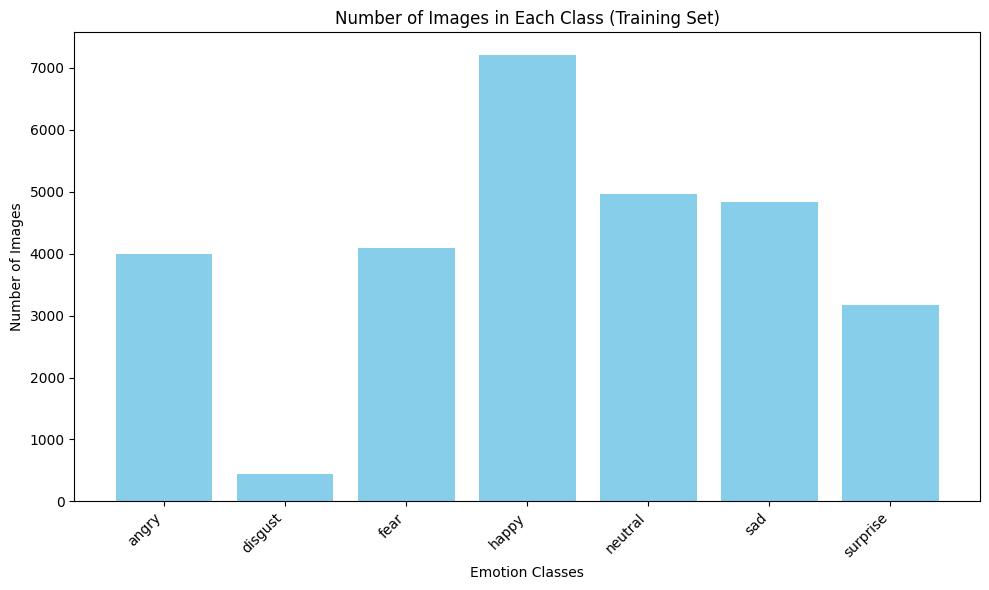

In [22]:
import os
import matplotlib.pyplot as plt

train_path = 'C:\\Users\\jayan\\archive\\train'

class_names = sorted(os.listdir(train_path))

class_counts = {class_name: len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names}

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Number of Images in Each Class (Training Set)')
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


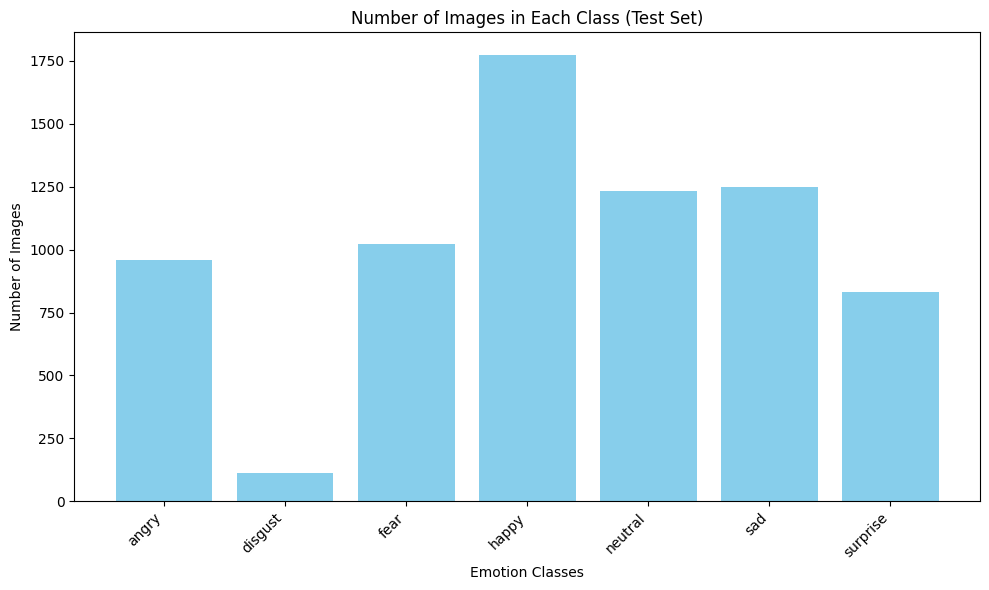

In [28]:
import os
import matplotlib.pyplot as plt

train_path = 'C:\\Users\\jayan\\archive\\test'

class_names = sorted(os.listdir(train_path))

class_counts = {class_name: len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names}

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Number of Images in Each Class (Test Set)')
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
!pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 4.9 MB/s eta 0:00:00


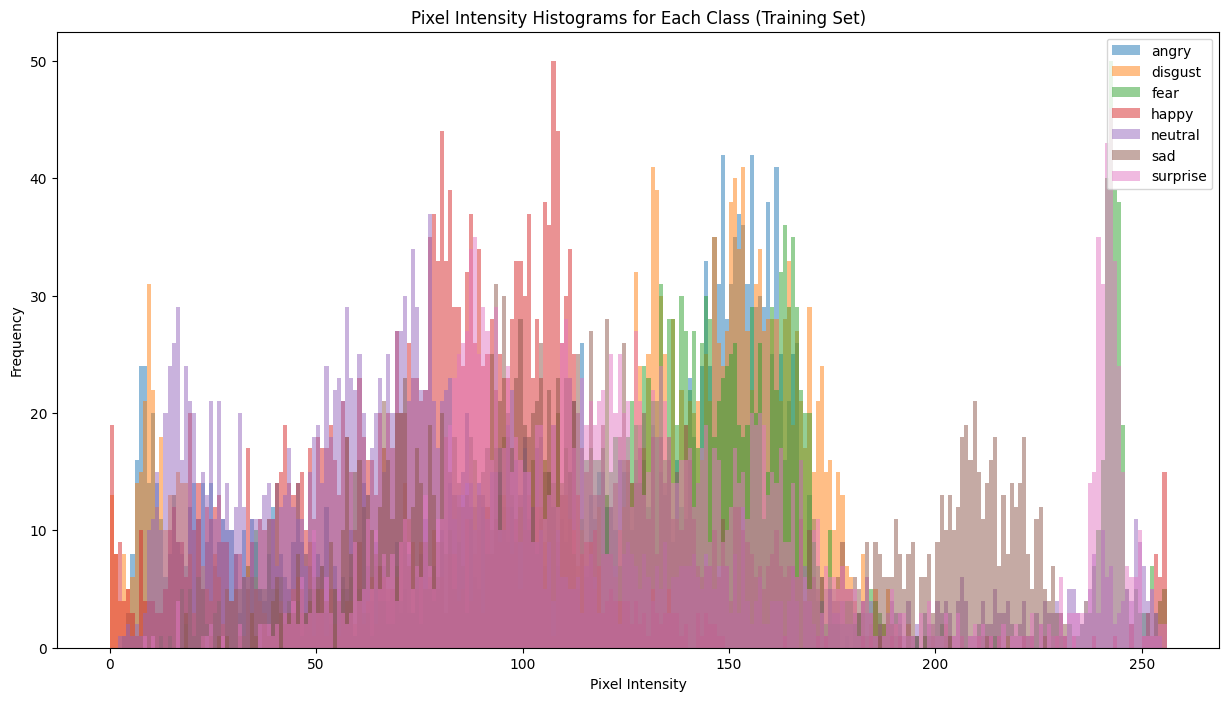

In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

train_path = 'C:\\Users\\jayan\\archive\\train'

class_names = sorted(os.listdir(train_path))

plt.figure(figsize=(15, 8))

for class_name in class_names:
    class_path = os.path.join(train_path, class_name)
    image_files = os.listdir(class_path)

    example_image_path = os.path.join(class_path, image_files[0])
    example_image = cv2.imread(example_image_path, cv2.IMREAD_GRAYSCALE)

    flattened_image = example_image.flatten()

    plt.hist(flattened_image, bins=256, range=[0, 256], alpha=0.5, label=class_name)

plt.title('Pixel Intensity Histograms for Each Class (Training Set)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


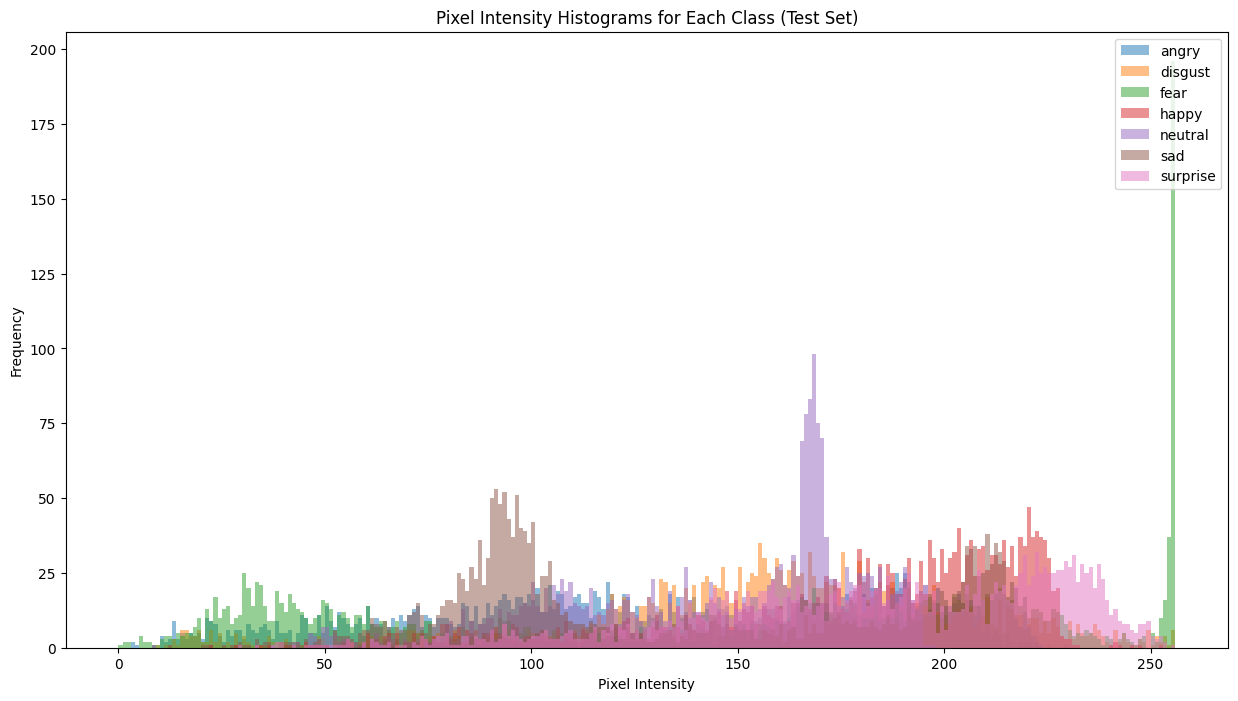

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_path = 'C:\\Users\\jayan\\archive\\test'

class_names = sorted(os.listdir(test_path))

plt.figure(figsize=(15, 8))

for class_name in class_names:
    class_path = os.path.join(test_path, class_name)
    image_files = os.listdir(class_path)

    example_image_path = os.path.join(class_path, image_files[0])
    example_image = cv2.imread(example_image_path, cv2.IMREAD_GRAYSCALE)

    flattened_image = example_image.flatten()

    plt.hist(flattened_image, bins=256, range=[0, 256], alpha=0.5, label=class_name)

plt.title('Pixel Intensity Histograms for Each Class (Test Set)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def custom_cnn_model(input_shape=(48, 48, 1), num_classes=7):
    model = Sequential()

    # Convolutional layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Convolutional layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Convolutional layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  
    model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

custom_cnn = custom_cnn_model()

custom_cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

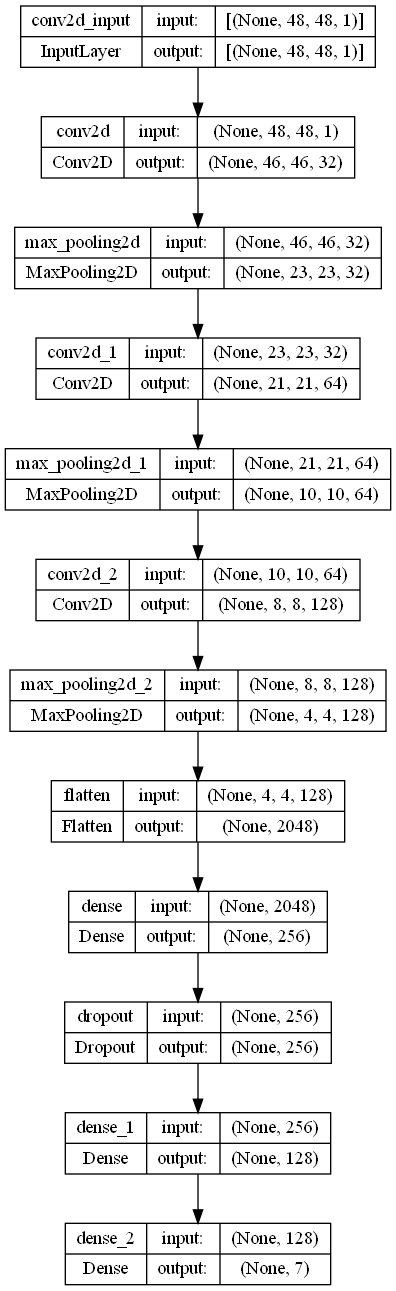

In [4]:
from tensorflow.keras.utils import plot_model


plot_model(custom_cnn, to_file='custom_cnn_model.png', show_shapes=True, show_layer_names=True)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_path = 'C:\\Users\\jayan\\archive\\train'
test_path = 'C:\\Users\\jayan\\archive\\test'
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False  
)



steps_per_epoch = train_generator.n // batch_size

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
from tensorflow.keras.models import load_model

custom_cnn = load_model('C:\\Users\\jayan\\50_custom_cnn_model.h5',compile=False)

custom_cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



custom_cnn_history = custom_cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=25,  
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size,
    verbose=1
)



Epoch 1/25
897/897 [==============================] - 68s 75ms/step - loss: 1.1306 - accuracy: 0.5751 - val_loss: 1.0704 - val_accuracy: 0.5954
Epoch 2/25
897/897 [==============================] - 38s 43ms/step - loss: 1.1312 - accuracy: 0.5717 - val_loss: 1.0704 - val_accuracy: 0.5978
Epoch 3/25
897/897 [==============================] - 38s 43ms/step - loss: 1.1262 - accuracy: 0.5734 - val_loss: 1.0802 - val_accuracy: 0.5910
Epoch 4/25
897/897 [==============================] - 38s 43ms/step - loss: 1.1203 - accuracy: 0.5771 - val_loss: 1.0601 - val_accuracy: 0.5992
Epoch 5/25
897/897 [==============================] - 39s 44ms/step - loss: 1.1191 - accuracy: 0.5791 - val_loss: 1.0763 - val_accuracy: 0.5905
Epoch 6/25
897/897 [==============================] - 51s 56ms/step - loss: 1.1180 - accuracy: 0.5766 - val_loss: 1.0666 - val_accuracy: 0.5946
Epoch 7/25
897/897 [==============================] - 36s 40ms/step - loss: 1.1098 - accuracy: 0.5793 - val_loss: 1.0850 - val_accuracy:

NameError: name 'plt' is not defined

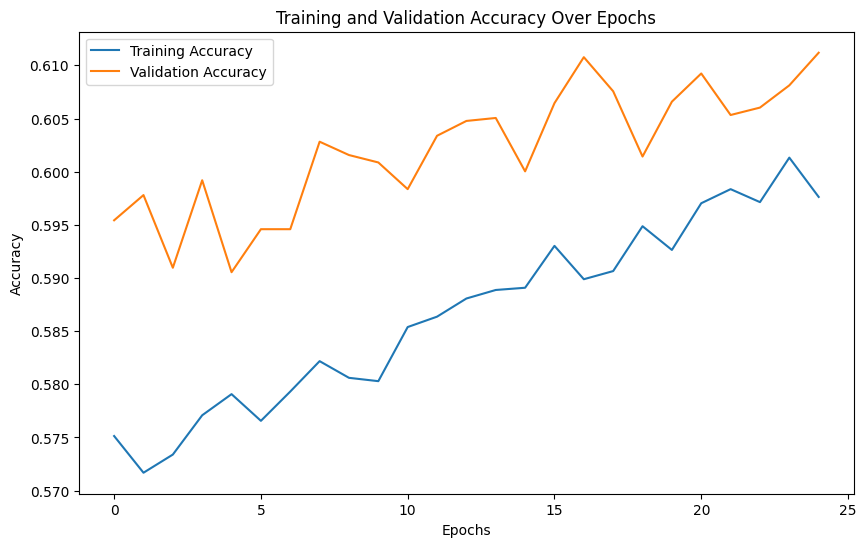

Trained model saved to: C:\Users\jayan\75_custom_cnn_model.h5


In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(custom_cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(custom_cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_save_path = 'C:\\Users\\jayan\\75_custom_cnn_model.h5'
custom_cnn.save(model_save_path)
print(f"Trained model saved to: {model_save_path}")

In [13]:
from tensorflow.keras.models import load_model

custom_cnn_model = load_model('C:\\Users\\jayan\\75_custom_cnn_model.h5')
test_steps = test_generator.n // batch_size
test_loss, test_acc = custom_cnn_model.evaluate(test_generator, steps=test_steps)
print(f"Test Accuracy: {test_acc}")

224/224 [==============================] - 3s 13ms/step - loss: 1.0350 - accuracy: 0.6112
Test Accuracy: 0.6111885905265808


Found 7178 images belonging to 7 classes.
225/225 [==============================] - 13s 54ms/step


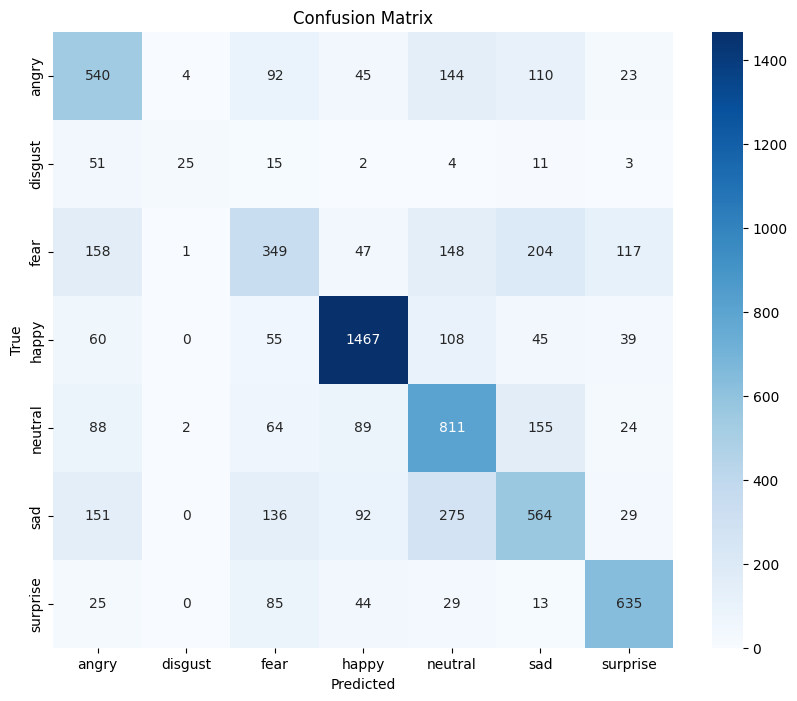

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False  
)

custom_cnn_model = load_model('C:\\Users\\jayan\\75_custom_cnn_model.h5')

true_labels = test_generator.classes

predictions = custom_cnn_model.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


1/1 [==============================] - 0s 16ms/step


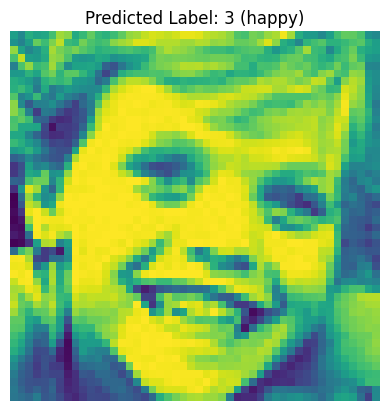

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


image_path = 'C:\\Users\\jayan\\archive\\test\\happy\\PrivateTest_3447769.jpg'

img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

predictions = custom_cnn_model.predict(img_array)

predicted_label = np.argmax(predictions)

class_mapping = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


predicted_class_name = class_mapping.get(predicted_label, 'Unknown')

plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label} ({predicted_class_name})')
plt.show()


In [1]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in base_model.layers[-10:]:
    layer.trainable = True

Densemodel = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  
])

Densemodel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

train_path = 'C:\\Users\\jayan\\archive\\train'
val_path = 'C:\\Users\\jayan\\archive\\test'


batch_size = 32
epochs = 10  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
Densemodelhistory = Densemodel.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    verbose=1
)



Epoch 1/25
897/897 [==============================] - 437s 475ms/step - loss: 1.6532 - accuracy: 0.3564 - val_loss: 1.3904 - val_accuracy: 0.4669
Epoch 2/25
897/897 [==============================] - 438s 489ms/step - loss: 1.3629 - accuracy: 0.4775 - val_loss: 1.2950 - val_accuracy: 0.5027
Epoch 3/25
897/897 [==============================] - 433s 483ms/step - loss: 1.2509 - accuracy: 0.5200 - val_loss: 1.1680 - val_accuracy: 0.5516
Epoch 4/25
897/897 [==============================] - 431s 481ms/step - loss: 1.1651 - accuracy: 0.5587 - val_loss: 1.1597 - val_accuracy: 0.5799
Epoch 5/25
897/897 [==============================] - 437s 487ms/step - loss: 1.1189 - accuracy: 0.5753 - val_loss: 1.1466 - val_accuracy: 0.5745
Epoch 6/25
897/897 [==============================] - 424s 472ms/step - loss: 1.0817 - accuracy: 0.5933 - val_loss: 1.0829 - val_accuracy: 0.5944
Epoch 7/25
897/897 [==============================] - 438s 488ms/step - loss: 1.0375 - accuracy: 0.6092 - val_loss: 1.0407 -

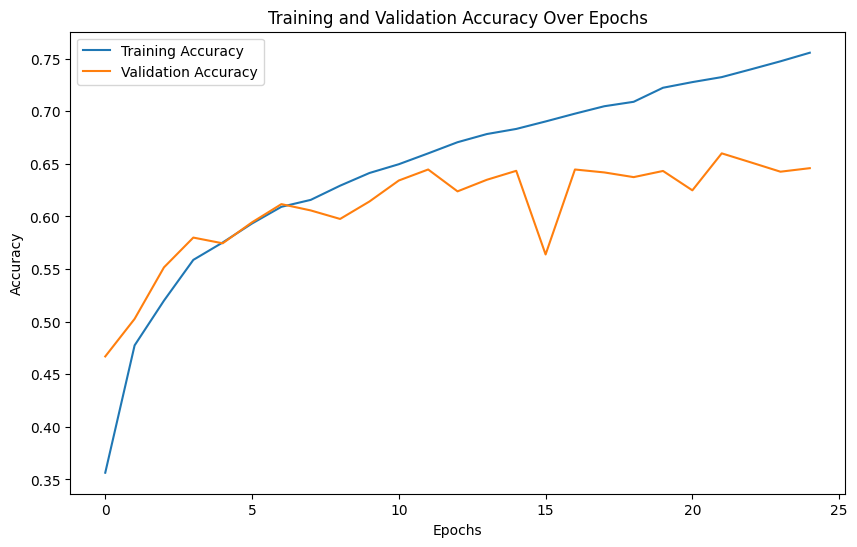

Trained model saved to: C:\Users\jayan\25_Dense_cnn_model.h5


In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(Densemodelhistory.history['accuracy'], label='Training Accuracy')
plt.plot(Densemodelhistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_save_path = 'C:\\Users\\jayan\\25_Dense_cnn_model.h5'
Densemodel.save(model_save_path)
print(f"Trained model saved to: {model_save_path}")

In [14]:
from tensorflow.keras.models import load_model


val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

Densemodel = load_model('C:\\Users\\jayan\\25_Dense_cnn_model.h5')
test_steps = val_generator.n // batch_size
test_loss, test_acc = Densemodel.evaluate(val_generator, steps=test_steps)
print(f"Test Accuracy: {test_acc}")

Found 7178 images belonging to 7 classes.
224/224 [==============================] - 99s 400ms/step - loss: 1.0905 - accuracy: 0.6459
Test Accuracy: 0.6459263563156128


Found 7178 images belonging to 7 classes.
225/225 [==============================] - 87s 387ms/step


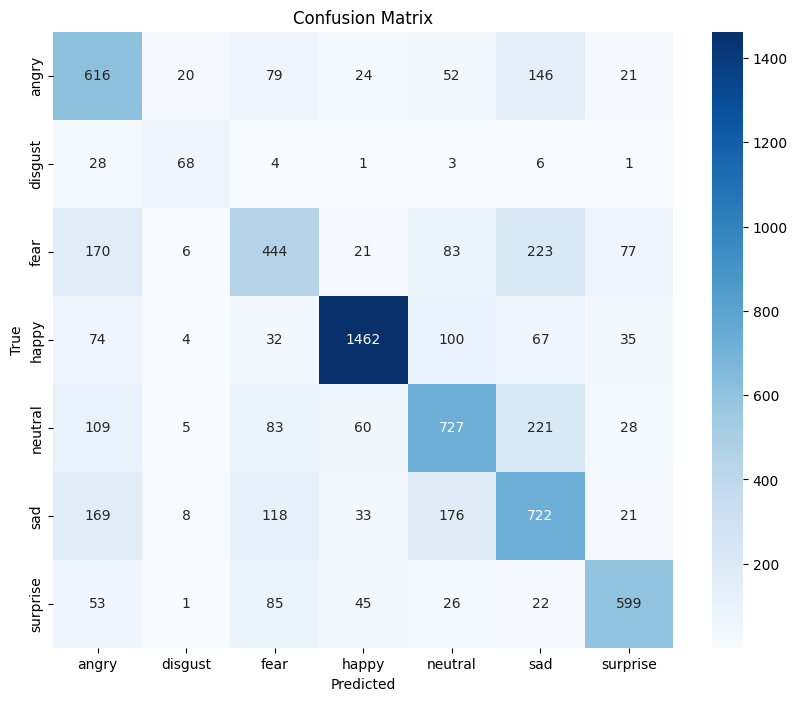

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)



true_labels = test_generator.classes

predictions = Densemodel.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


1/1 [==============================] - 7s 7s/step


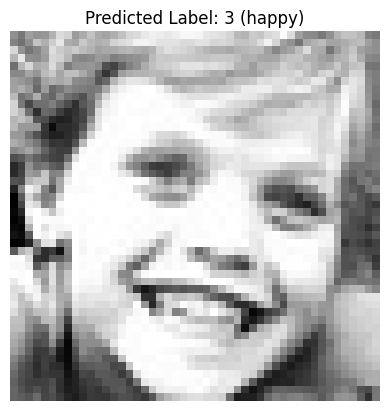

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


image_path = 'C:\\Users\\jayan\\archive\\test\\happy\\PrivateTest_3447769.jpg'

img = image.load_img(image_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

predictions = Densemodel.predict(img_array)

predicted_label = np.argmax(predictions)

class_mapping = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


predicted_class_name = class_mapping.get(predicted_label, 'Unknown')

plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label} ({predicted_class_name})')
plt.show()
